In [1]:
import numpy as np
import matplotlib.pyplot as plt
from evalf import evalf
from euler import euler
from scipy.integrate import odeint

%load_ext autoreload
%autoreload 2

def better_imshow(row_vals, col_vals, data, ax=None):
    #row_vals and col_vals are the data that was swept over
    assert len(row_vals) == data.shape[0], 'length of row_vals does not match shape of data'
    assert len(col_vals) == data.shape[1], 'length of col_vals does not match shape of data'
    if ax == None:
        plt.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
    else:
        ax.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')

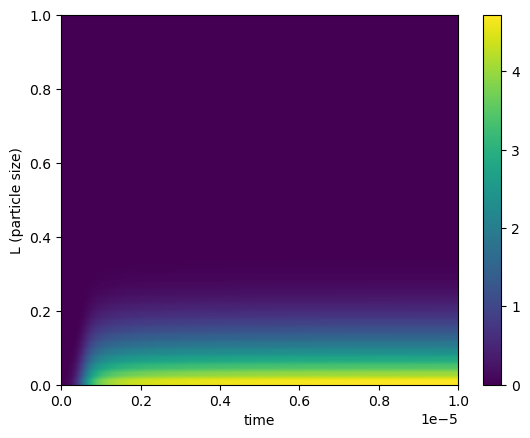

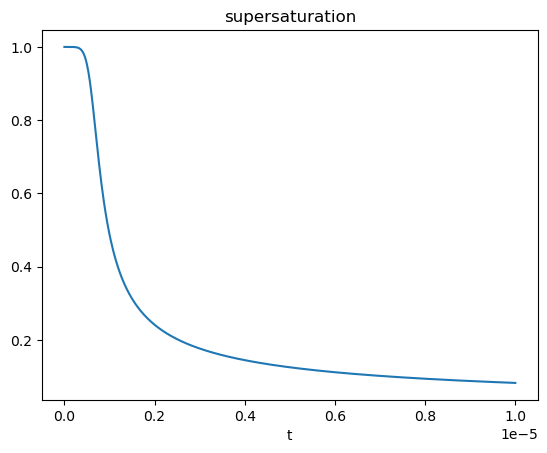

Text(0.5, 0, 't')

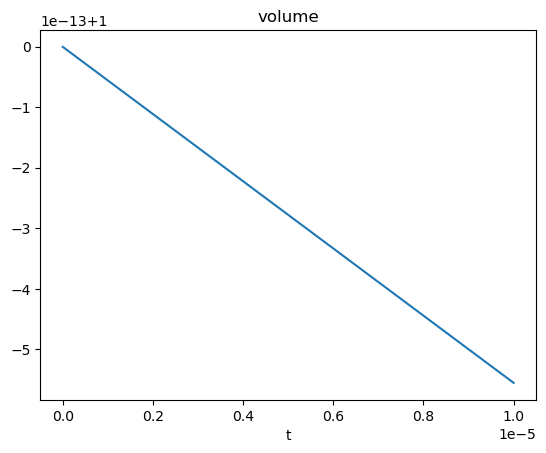

In [5]:
L_list = np.linspace(0,1, 50)
tlist = np.linspace(0,1e-5,1000) 


S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution

#parameters
p = {"L_list" : L_list, #discretization bins
     'E' :  1e-7, #evaporation rate
     'V' : 1e-3, #solvent volume
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e6, #growth rate constant m/s
     'g' : 3, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :5, #power constant for nucleation
     'Breakage': True, #toggle breakage for debug
     'weno': False
     }


#integrate the equations
x0 = np.hstack([S0, V0, n0])
x_t = euler(x0, t_vec = tlist, p = p) 


#plot results
n_t = x_t[:,2:]
x_ref = x_t[999,2:] #reference for analysis below
better_imshow(L_list, tlist, n_t.T)
plt.ylabel('L (particle size)')
plt.xlabel('time')
plt.colorbar()
plt.show()

plt.plot(tlist, x_t[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')
plt.show()

plt.plot(tlist, x_t[:,1]) 
plt.title('volume')
plt.xlabel('t')

In [7]:
print(x_t.shape)

(1000, 52)


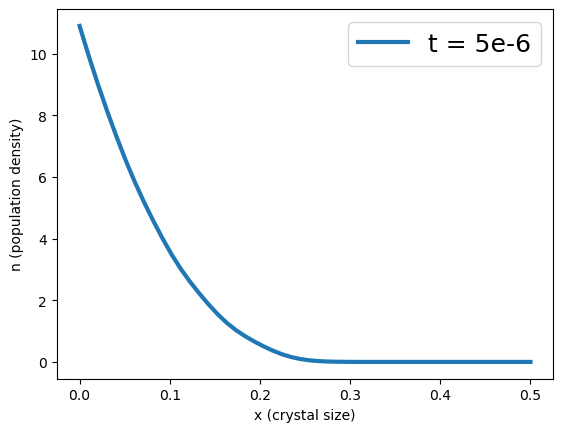

In [18]:
#plot results
n_t = x_t[999,2:]
plt.figure(figsize=[6.4,4.8])
ax1 = plt.gca()
ax1.plot(L_list, n_t, linewidth = 3, label =r't = 5e-6')
#ax1.plot(L_list, x_t[500,2:], linewidth = 3, label =r't = 5e-6')

#ax1.set_xlim([0, 10])
#ax1.set_ylim([0, 6])
ax1.set_ylabel("n (population density)")
ax1.set_xlabel("x (crystal size)")
ax1.legend(prop={'size': 18}) 


In [32]:
dt_list = np.logspace(-9, -7, 15)
x_final_list = []
for dt in dt_list: 
    tlist = np.arange(0, 1e-5, dt)
    #integrate
    x_t = euler(x0, t_vec = tlist, p = p) 
    x_final_list.append(x_t[-1,2:])
    

Text(0.5, 0, '$\\Delta t$')

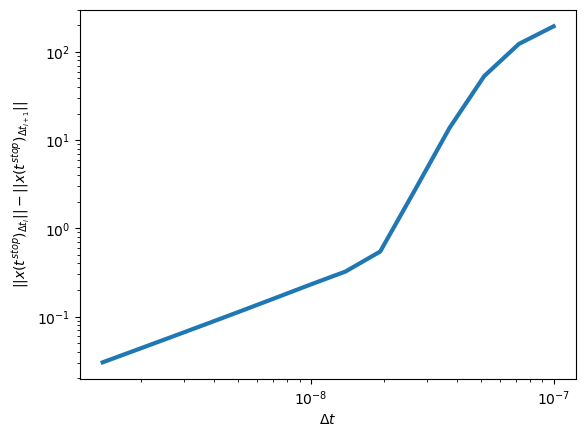

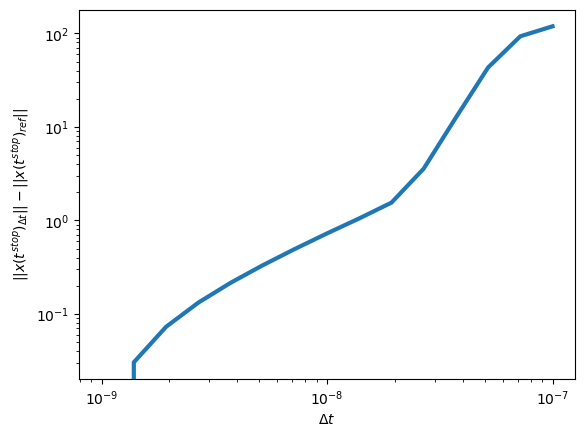

In [43]:
x_ref = x_final_list[0]
error_ref = []
error_successive = []
for i in range(len(dt_list)):
    error_ref.append(np.linalg.norm(x_final_list[i] - x_ref, ord= np.inf))
for i in range(len(dt_list)-1):
    error_successive.append(np.linalg.norm(x_final_list[i] - x_final_list[i+1], ord= np.inf))


plt.figure(figsize=[6.4,4.8])
ax1 = plt.gca()
ax1.loglog(dt_list[1:], error_successive, linewidth = 3)
ax1.set_ylabel(r"$||x(t^{stop})_{\Delta t_{i}}|| - ||x(t^{stop})_{\Delta t_{i + 1}}||$")
ax1.set_xlabel(r"$\Delta t$")

plt.figure(figsize=[6.4,4.8])
ax1 = plt.gca()
ax1.loglog(dt_list, error_ref, linewidth = 3)
ax1.set_ylabel(r"$||x(t^{stop})_{\Delta t}|| - ||x(t^{stop})_{ref}||$")
ax1.set_xlabel(r"$\Delta t$")

In [ ]:
#also check relative error (compared to norm(n))